# 基于机器学习算法的Iris数据分类

## 一、数据集的处理

### 1.1. 导入鸢尾属植物数据集，保持文本不变。
该数据集是经典数据集，有两种导入方式，**一是**调用scikit-learn模块中的load_iris函数来加载数据。**二是**直接下载数据集保存到本地后直接导入。

#### 1.1.1使用scikit-learn模块导入
使用load_iris函数来调用数据集，并通过探索性分析厘清数据集的**样本数量、特征数量、样本类别**等基本信息，方便后续的具体分析。同时通过查阅资料，load_iris 返回的 iris 对象是一个 Bunch 对象，与字典非常相似，里面包含键和值：DESCR 键对应的值是数据集的简要说明。



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris_dataset=load_iris()
print(iris_dataset.keys())
print(iris_dataset['DESCR'][:193]+'\n...')

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


于是可以从中得知：这是一个包含150个样本的数据集。每个类别分别有50个，每一个实例拥有四个特征。   
根据输出的key中的值，我们对该数据集做进一步的探索性分析：   

In [7]:
print("Target names: {}".format(iris_dataset['target_names']))
print("Feature names: {}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)


`target_names`键对应的值是一个字符串数组，里面包含着要预测的花的品种：setosa，versicolor，virginica;    
`feature_names`键对应的值是一个字符串列表，对每一个特征进行了说明：       
sepal length (cm), sepal width (cm), petal length (cm),petal width (cm)   
具体的数据包含在target 和data 字段中。data 里面是花萼长度、花萼宽度、花瓣长度、花瓣宽度的测量数据，格式为numpy数组。    
data 数组的每一行对应一朵花，列代表每朵花的4个测量数据。     


尝试输出data中的前5行的数据，以及target中的数据。

In [8]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))
print("Target:\n{}".format(iris_dataset['target']))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


由target names输出可知，数字“0”代表“setosa”，数字“1”代表“versicolor”，数字“2”代表“virginica”。

对数据进行合并与格式化操作。
1. 将target数组中的数字与鸢尾花品种的英文做一一替换，替换规则由target_names中的顺序给出。
2. 将data中的数据每一行后面增加一个特征值，即加上第一步中替换后的文本。
3. 使用pandas模块中的DataFrame函数，将数据加上列标题。
4. 将导入并处理好的文件保存。


第一步：替换

In [9]:
target_map_dict={0:'setosa',1:'versicolor',2:'virginica'}


第二步：加列合并   
该函数是将target_map函数转换为向量化函数的操作。np.vectorize()是Numpy库中的一个函数，它可以把一个Python函数转换成可以接受数组作为输入并返回数组作为输出的向量化函数。target_map是需要被转换的函数。通过np.vectorize(target_map)操作，可以方便地对数组中的每个元素应用target_map函数，而无需使用显式的循环。


In [10]:
def target_map(x,map_dict):
    return map_dict[x] if x in map_dict else x
target_map_vector=np.vectorize(target_map)
iris_target_maped=target_map_vector(iris_dataset['target'],target_map_dict)

第三步：加上列标题，并查看前十个数据

In [11]:
iris_data=np.c_[iris_dataset['data'],iris_target_maped]
iris_dataset=pd.DataFrame(iris_data,columns=['sepal_length','sepal_width','petal_length','petal_width','species'])
print(iris_dataset.head(10))


  sepal_length sepal_width petal_length petal_width species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa
5          5.4         3.9          1.7         0.4  setosa
6          4.6         3.4          1.4         0.3  setosa
7          5.0         3.4          1.5         0.2  setosa
8          4.4         2.9          1.4         0.2  setosa
9          4.9         3.1          1.5         0.1  setosa


第四步：文件保存

In [12]:
np.savetxt('iris.data', iris_dataset, fmt='%s',delimiter=',')
iris_data = np.loadtxt('iris.data', dtype=object, delimiter=',',skiprows=0)
print(iris_data[0:10])

[['5.1' '3.5' '1.4' '0.2' 'setosa']
 ['4.9' '3.0' '1.4' '0.2' 'setosa']
 ['4.7' '3.2' '1.3' '0.2' 'setosa']
 ['4.6' '3.1' '1.5' '0.2' 'setosa']
 ['5.0' '3.6' '1.4' '0.2' 'setosa']
 ['5.4' '3.9' '1.7' '0.4' 'setosa']
 ['4.6' '3.4' '1.4' '0.3' 'setosa']
 ['5.0' '3.4' '1.5' '0.2' 'setosa']
 ['4.4' '2.9' '1.4' '0.2' 'setosa']
 ['4.9' '3.1' '1.5' '0.1' 'setosa']]


#### 1.1.2使用本地文件导入
本地导入数据集时，查看数据集的内容会变得非常方便。可以清晰地看到，该数据集中含有的特征以及样本数量。需要注意的是，本地导入时的数据集的最后一列未编码，故需要单独对其进行编码，方便后续分析。


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

ModuleNotFoundError: No module named 'seaborn'

In [9]:
data=r'C:\Users\Xxk14\Desktop\阿康的秘密文件\学习资料\Pythonfinalproject\数据集\iris.csv'
iris_local=pd.read_csv(data,usecols=[0,1,2,3,4,5])
iris_local=iris_local.dropna()   #删除空值
iris_local.head()
iris_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# 载入特征和标签集
x=iris_local[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y=iris_local['Species']

In [11]:
# 对标签集进行编码
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


为了使数据集的来源更加可靠，后续分析中采用了直接从scikit-learn模块导入的数据

### 1.2. 求出鸢尾属植物萼片长度的平均值、中位数和标准差（第1列，sepallength）

In [12]:
filename='iris.data'
sepallength=np.loadtxt(filename,dtype=float,delimiter=',',usecols=[0])
print(np.mean(sepallength))
print(np.median(sepallength))
print(np.std(sepallength))

5.843333333333334
5.8
0.8253012917851409


### 1.3. 创建一种标准化形式的鸢尾属植物萼片长度，其值正好介于0和1之间，这样最小值为0，最大值为1（第1列，sepallength）。
核心的算法就是：计算sepallength数组中最大值和最小值，然后将sepallength中的每个元素减去最小值并除以最大值与最小值之差，最后打印处理后的前10个元素。方法二中使用了NumPy库中的ptp这个函数。输出前十个作为测试。



In [13]:
Max=np.amax(sepallength)
Min=np.amin(sepallength)
#方法一：
x=(sepallength-Min)/(Max-Min)
print(x[:10])

[0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556
 0.08333333 0.19444444 0.02777778 0.16666667]


In [14]:
#方法二：
x=(sepallength-Min)/np.ptp(sepallength)
print(x[:10])

[0.22222222 0.16666667 0.11111111 0.08333333 0.19444444 0.30555556
 0.08333333 0.19444444 0.02777778 0.16666667]


### 1.4. 找到鸢尾属植物萼片长度的第5和第95百分位数（第1列，sepallength）。
使用numpy库中的percentile函数，计算sepallength数组中5%和95%的分位数，并通过print函数将结果打印出来。



In [15]:
print(np.percentile(sepallength, [5,95]))

[4.6   7.255]


### 1.5. 把iris_data数据集中的20个随机位置修改为np.nan值。
**方法**：在iris_data数据集中随机选择20个元素，并将其赋值为NaN（Not a Number）。作用是对iris_data数据集进行随机采样，并将采样得到的元素替换为NaN，用于后续的数据处理或分析任务。
1. 获取iris_data数据集的行数i和列数j；
2. 使用np.random.randint函数生成20个随机整数，分别作为行索引和列索引，用于指定要替换为NaN的元素位置；
使用np.nan来替换指定位置上的元素；
3. 最后输出iris_data数据集的前十行输出测试。在这里为了方便展示，故意选了一个前十行中NaN替代比较多的seed值。（也是确保了每次运行结果的可复现性）

**由于使用的列不仅仅是第一列，故需要重新loadtxt，并usecols=[0,1,2,3]。**


In [16]:
filename='iris.data'
iris_data=np.loadtxt(filename,dtype=float,delimiter=',',usecols=[0,1,2,3])
i,j=iris_data.shape
np.random.seed(20240529)
iris_data[np.random.randint(i,size=20),np.random.randint(j,size=20)]=np.nan
print(iris_data[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 nan 1.5 0.2]
 [5.  3.6 1.4 nan]
 [5.4 3.9 nan 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 1.6. 在iris_data的sepallength中查找缺失值的个数和位置（第1列）。
从指定文件中加载数据到iris_data数组中，使用“,” 作为分隔符，在这里选择了第0、1、2、3列数据。获取iris_data数组的行数和列数，并将它们分别赋值给变量i和j。使用np.random.seed设置随机数种子为20240529，确保了每次运行结果的可复现性。在iris_data数组中随机选择20个元素，并将其赋值为np.nan，即NaN（Not a Number）。从iris_data数组中提取出第一列数据，即花萼长度，并将其赋值给sepallength变量。使用np.isnan函数判断sepallength中是否有NaN值，并将结果赋值给x变量。计算x中True值的数量，即NaN值的数量，并打印结果。使用NumPy中的where函数输出x中True值的索引位置，即NaN值所在的行索引。



In [17]:
seplallength=iris_data[:,0]
x=np.isnan(seplallength)
print(sum(x))
print(np.where(x))

3
(array([ 80, 147, 148], dtype=int64),)


### 1.7. 筛选具有 sepallength（第1列）< 5.0 并且 petallength（第3列）> 1.5 的 iris_data行。
将加载的数据中的第0列和第2列数据分别存储到sepallength和petallength变量中。使用np.where函数和逻辑运算符，筛选出花瓣长度大于1.5且花萼长度小于5.0的数据的索引。输出筛选出的数据的索引和数据本身。


In [18]:
filename='iris.data'
iris_data=np.loadtxt(filename,dtype=float,delimiter=',',usecols=[0,1,2,3])
sepallength=iris_data[:,0]
petallength=iris_data[:,2]
index=np.where(np.logical_and(petallength>1.5,sepallength<5.0))
print(index)
print(iris_data[index])

(array([ 11,  24,  29,  30,  57, 106], dtype=int64),)
[[4.8 3.4 1.6 0.2]
 [4.8 3.4 1.9 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [4.9 2.4 3.3 1. ]
 [4.9 2.5 4.5 1.7]]


### 1.8. 选择没有任何 nan 值的 iris_data行。
使用np.isnan(iris_data)检查数据中的每个元素是否为NaN，得到一个布尔型数组。对该数组沿行(axis=1)求和，可以得到每行中NaN值的数量。通过比较这个求和结果与0，筛选出没有任何NaN值的行，存储在变量x中。


In [19]:
x=iris_data[np.sum(np.isnan(iris_data),axis=1)==0]
print(x[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 1.9. 计算 iris_data 中sepalLength（第1列）和petalLength（第3列）之间的相关系数。
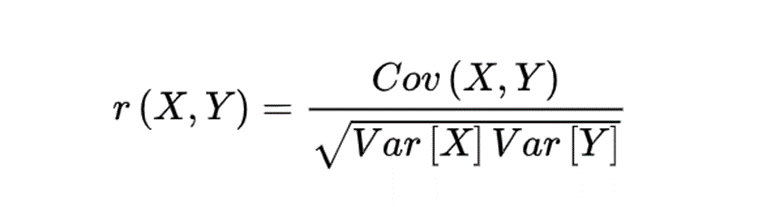

根据相关系数计算公式，首先计算sepalLength和petalLength的均值，分别存储到m1和m2变量中。再使用np.dot函数计算sepalLength和petalLength的协方差，存储到cov变量中。同样使用np.dot函数分别计算sepalLength和petalLength的标准差，存储到std1和std2变量中。最后将cov除以std1乘以std2的结果打印输出。


In [20]:
iris_data = np.loadtxt(filename,dtype=float,delimiter=',',usecols=[0,1,2,3])
sepalLength =iris_data[:,0]
petalLength =iris_data[:,2]
m1=np.mean(sepalLength)
m2=np.mean(petalLength)
cov =np.dot(sepalLength-m1,petalLength-m2)
std1 = np.sqrt(np.dot(sepalLength-m1,sepalLength- m1))
std2 = np.sqrt(np.dot(petalLength-m2,petalLength- m2))
print(cov/(std1*std2))

0.8717537758865832


### 1.10. 找出iris_data是否有任何缺失值。
用于判断iris_data数据集中是否存在NaN值。首先使用np.isnan()函数检查iris_data中的每个元素是否为NaN，返回一个与iris_data形状相同的布尔数组。然后，使用np.any()函数检查该布尔数组中是否存在True，即是否存在NaN值。如果存在，则返回True；如果不存在，则返回False。


In [21]:
x=np.isnan(iris_data)
print(np.any(x))

False


### 1.11在numpy数组中将所有出现的nan替换成0
使用np.isnan函数判断iris_data中是否为NaN值，如果是则替换为0。


In [22]:
iris_data = np.loadtxt(filename,dtype=float,delimiter=',',usecols=[0,1,2,3])
i,j= iris_data.shape
np.random.seed(20240529)
iris_data[np.random.randint(i,size=20),np.random.randint(j,size=20)] = np.nan
iris_data[np.isnan(iris_data)]=0
print(iris_data[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 0.  1.5 0.2]
 [5.  3.6 1.4 0. ]
 [5.4 3.9 0.  0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 1.12. 找出鸢尾属植物物种中的唯一值和唯一值出现的数量。
根据前面的试探性分析，已经初步得知唯一值和唯一值出现的数量。


In [23]:
iris_data = np.loadtxt(filename ,dtype=object,delimiter=',',usecols=[4])
x= np.unique(iris_data,return_counts=True)
print(x)

(array(['setosa', 'versicolor', 'virginica'], dtype=object), array([50, 50, 50], dtype=int64))


### 1.13. 将 iris_data 的花瓣长度（第3列）以形成分类变量的形式显示。定义：Less than 3 --> ‘small’；3-5 --> ‘medium’；’>=5 --> ‘large’。
首先，使用np.loadtxt函数从指定文件中读取数据，参数dtype指定数据类型为浮点型，delimiter指定分隔符为逗号，usecols指定只读取前四列数据。然后，使用np.digitize函数将花萼长度值分组，分组的边界值为[0,3,5,10]，返回值为每个花萼长度值对应的分组索引。接着，定义一个字典label_map，将分组索引1、2、3、4分别映射为'small'、'median'、'large'和np.nan。最后，使用列表解析式将每个花萼长度的分组索引映射为对应的标签，并打印前10个标签值。


In [24]:
iris_data = np.loadtxt(filename,dtype=float,delimiter=',',usecols=[0,1,2,3])
petal_length_bin = np.digitize(iris_data[:,2],[0,3,5,10])
label_map ={1:'small',2:'median',3:'large',4:np.nan}
petal_length_cat = [label_map[x] for x in petal_length_bin]
print(petal_length_cat[0:10])

['small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small', 'small']


### 1.14. 根据 sepallength 列对数据集进行排序。
np.argsort函数用于返回升序排序后元素对应的索引值。


In [25]:
iris_data =np.loadtxt(filename,dtype=object,delimiter=',')
sepalLength = iris_data[:,0]
index= np.argsort(sepalLength)
print(iris_data[index][0:10])

[['4.3' '3.0' '1.1' '0.1' 'setosa']
 ['4.4' '3.2' '1.3' '0.2' 'setosa']
 ['4.4' '3.0' '1.3' '0.2' 'setosa']
 ['4.4' '2.9' '1.4' '0.2' 'setosa']
 ['4.5' '2.3' '1.3' '0.3' 'setosa']
 ['4.6' '3.6' '1.0' '0.2' 'setosa']
 ['4.6' '3.1' '1.5' '0.2' 'setosa']
 ['4.6' '3.4' '1.4' '0.3' 'setosa']
 ['4.6' '3.2' '1.4' '0.2' 'setosa']
 ['4.7' '3.2' '1.3' '0.2' 'setosa']]


## 二、可视化操作
任意两个不同的属性组合，查看散点图上不同鸢尾花的分布情况。


首先，将Bunch对象中的特征数据转换为pandas DataFrame，列名设置为iris_dataset.feature_names。接下来，将目标变量（数字形式）添加到DataFrame中，命名为'species'。使用apply()函数和lambda表达式将目标变量的整数值替换为对应的类别名称（如'setosa', 'versicolor', 'virginica'）。plot_pairplot(data)函数用于绘制数据的pairplot，它是seaborn库的一个功能，可以展示数据集中所有特征之间的两两关系。函数首先检查传入的数据是否为None。如果不是None，它会创建一个pairplot，其中data参数是输入的DataFrame，palette参数指定了颜色列表antV，hue参数用于按照'species'列的值对不同类别进行着色。绘制完成后，使用plt.show()显示图表。主程序首先调用load_data()函数，将返回的DataFrame存储在变量iris_data中。然后，它调用plot_pairplot(iris_data)，根据iris_data绘制pairplot图表。


e:\Environment\PythonEnvironment\py3.12\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
e:\Environment\PythonEnvironment\py3.12\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
e:\Environment\PythonEnvironment\py3.12\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
e:\Environment\PythonEnvironment\py3.12\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
e:\Environment\PythonEnvironment\py3.12\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The palette list has more values (9) than needed (3), which may

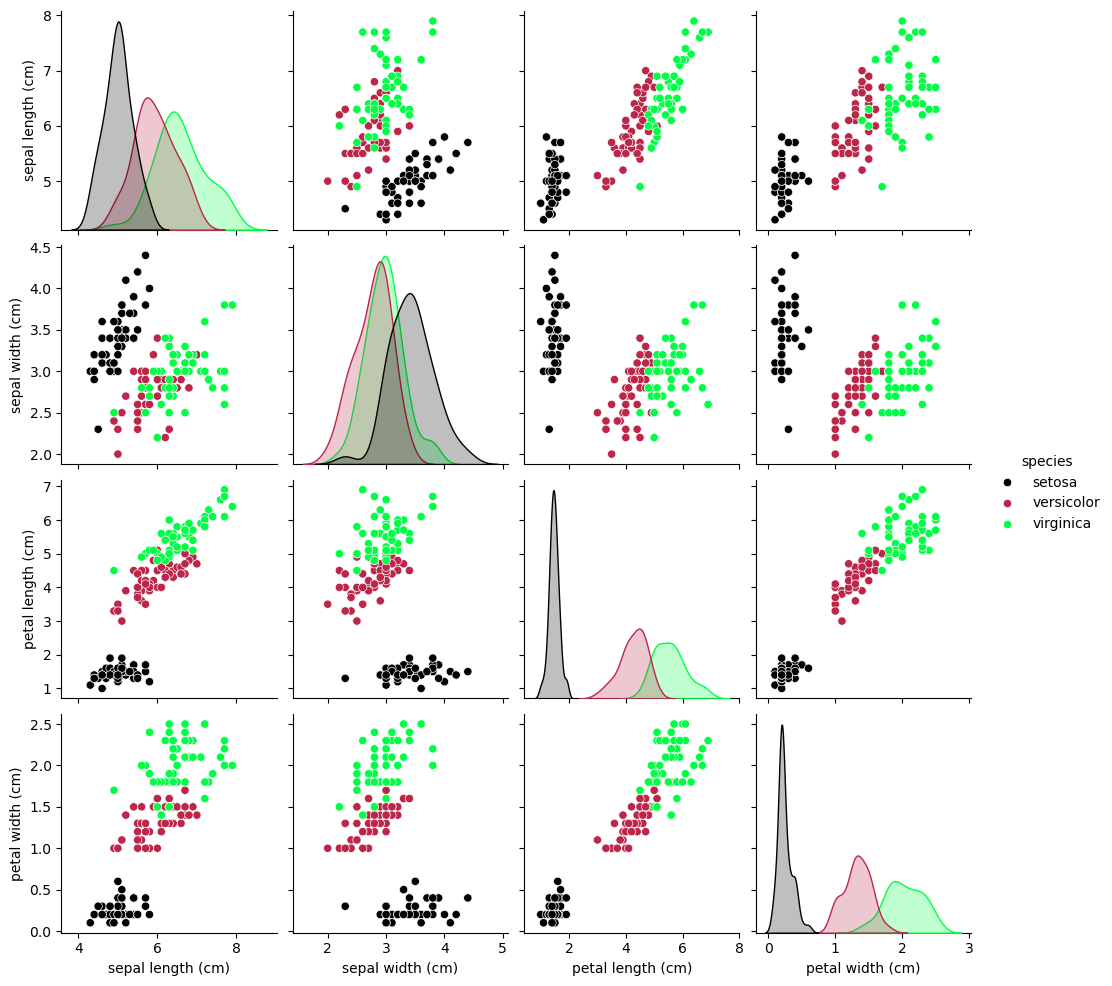

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# 定义颜色列表，确保其长度足够使用 
antV =['#010101','#BB2649','#00FF44','#8543E0','#1A455B','#93231C','#394F3F','#3436C7','#F04864']

def load_data():
        #加载iris数据集并返回DataFrame
    try:
        iris_dataset = load_iris()
        # 将数据集转换为ataFrame:以便seaborn处理
        data = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
        data['species']= iris_dataset.target
        data['species']= data['species'].apply(lambda x: iris_dataset.target_names[x])
        return data
    except Exception as e:
        print(f"数据加载出错:{e}")
        return None

def plot_pairplot(data):
        #使用seaborn绘制pairplot
    try:
        if data is not None :
            g=sns.pairplot(data=data, palette=antV, hue='species')
            plt.show()
        else:
            print("数据加载失败，无法绘制图表。")
    except Exception as e:
        print(f"绘图出错:{e}")

iris_data = load_data()
plot_pairplot(iris_data)

## 三、分类算法的实现
### 3.1 对数据集做标准化处理,将数据减去平均值再除以标准差
查阅资料可知，标准化处理是一种常见的数据预处理方法，可以将不同特征的数据缩放到同一范围内，方便后续的数据分析和处理。在本代码中，标准化处理后的数据范围被缩放到均值为0，标准差为1的范围内。

对iris数据集的四个特征（花萼长度、花萼宽度、花瓣长度、花瓣宽度）进行标准化处理，并将处理后的数据保存到文件中:


In [27]:
def standard_deviation(x,Mean ,std):
    return(x-Mean)/std
standard_deviation_vector=np.vectorize(standard_deviation)

这里定义了一个函数standard_deviation，用于计算一个数与指定均值的偏差除以指定标准差。使用np.vectorize将standard_deviation函数转换为可以作用于数组的向量化函数standard_deviation_vector。


In [28]:
np.savetxt('iris.data',iris_dataset,fmt='%s',delimiter=',')
iris_data = np.loadtxt('iris.data', dtype=object, delimiter=',', skiprows=0)
filename='iris.data'

使用np.savetxt将iris数据集保存到文件iris.data中。    
使用np.loadtxt读取文件iris.data中的数据，并保存到iris_data变量中。

In [29]:
sepallength =np.loadtxt(filename,dtype=float,delimiter=',',usecols=[0])
Mean1=np.mean(sepallength)
Std1=np.std(sepallength)
transform_number_sepallength=standard_deviation(sepallength,Mean1,std1)

读取文件iris.data中的花萼长度数据，并计算其均值和标准差。    

使用standard_deviation_vector函数对花萼长度数据进行标准化处理，并保存到transform_number_sepallength变量中。重复步骤5和步骤6，分别对花萼宽度、花瓣长度和花瓣宽度数据进行标准化处理。 
     
将标准化处理后的四个特征数据与原始数据的目标标签合并成一个新的数据集iris_data1。打印输出数据集iris_data1。



In [30]:
sepalwidth = np.loadtxt(filename,dtype=float,delimiter=',',usecols=[1])
Mean2=np.mean(sepalwidth)
Std2=np.std(sepalwidth)
transform_number_sepalwidth=standard_deviation(sepalwidth ,Mean2,Std2)

petallength= np.loadtxt(filename,dtype=float,delimiter=',',usecols=[2])
Mean3=np.mean(petallength)
Std3=np.std(petallength)
transform_number_petallength=standard_deviation(petallength ,Mean3,Std3)

petalwidth= np.loadtxt(filename,dtype=float,delimiter=',',usecols=[3])
Mean4=np.mean(petalwidth)
Std4=np.std(petalwidth)
transform_number_petalwidth=standard_deviation(petalwidth,Mean4,Std4)

iris_data1=np.c_[transform_number_sepallength,transform_number_sepalwidth,transform_number_petallength,transform_number_petalwidth, iris_dataset['species']]
print(iris_data1)

[[-0.07354030960541438 1.019004351971607 -1.3402265266227624
  -1.3154442950077403 'setosa']
 [-0.0933269399925213 -0.13197947932162468 -1.3402265266227624
  -1.3154442950077403 'setosa']
 [-0.11311357037962831 0.32841405319566835 -1.3970639535363654
  -1.3154442950077403 'setosa']
 [-0.12300688557318185 0.09821728693702184 -1.2833890997091593
  -1.3154442950077403 'setosa']
 [-0.08343362479896783 1.2492011182302534 -1.3402265266227624
  -1.3154442950077403 'setosa']
 [-0.04386036402475383 1.939791417006192 -1.1697142458819532
  -1.0521799264271385 'setosa']
 [-0.12300688557318185 0.7888075857129604 -1.3402265266227624
  -1.1838121107174393 'setosa']
 [-0.08343362479896783 0.7888075857129604 -1.2833890997091593
  -1.3154442950077403 'setosa']
 [-0.14279351596028877 -0.3621762455802712 -1.3402265266227624
  -1.3154442950077403 'setosa']
 [-0.0933269399925213 0.09821728693702184 -1.2833890997091593
  -1.4470764792980408 'setosa']
 [-0.04386036402475383 1.4793978844889 -1.2833890997091593

### 3.2 任选一种分类算法，对鸢尾属植物数据集进行分类。（从Sklearn函数中导入分类器）
**补充要求**：初始采集的数据会被分为训练集和测试集，用于建模的数据称为训练集，用来测试模型的数据称为测试集。利用scikit-learn中的train_test_split函数将原始数据集分为训练数据和测试数据，75%的数据用作训练集，25%用作测试集。

在进行机器学习之前，将数据集拆分为训练和测试数据集。为了方便载入特征和标签集，我们使用本地导入的csv文件进行后续的分析。


In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
iris = pd.read_csv(r'C:\Users\Xxk14\Desktop\阿康的秘密文件\学习资料\Pythonfinalproject\数据集\iris.csv', usecols=[1, 2, 3,4,5])
X= iris[['Sepal.Length','Sepal.Width', 'Petal.Length', 'Petal.Width']]
y= iris['Species']
encoder =LabelEncoder()
y=encoder.fit_transform(y)
train_x, test_x, train_y, test_y = train_test_split( X,y, test_size = 0.25, random_state = 101)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)


(112, 4) (112,) (38, 4) (38,)


使用train_test_split函数将数据集分为训练集和测试集，其中测试集占总数据集的25%。随机种子设置为101，以确保结果的可复现性。


#### 3.2.2根据不同模型的准确性选择合适的特征
分别使用了四种机器学习模型（支持向量机SVM、决策树、逻辑回归、KNN）对训练集（train_X, train_y）进行拟合，并使用测试集（test_X, test_y）进行预测，最后打印出各个模型的预测准确率。


In [ ]:
model = svm.SVC()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print('The accuracy of the svM is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

# Decision Tree
model = DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print('The accuracy of the Decision Tree is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

# Logistic Regression
model =LogisticRegression()
model.fit(train_x,train_y)
prediction =model.predict(test_x)
print('The accuracy of the Logistic Regression is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

# KNN
model = KNeighborsClassifier()
model.fit(train_x,train_y)
prediction =model.predict(test_x)
print('The accuracy of the KNN is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the svM is: 1.0
The accuracy of the Decision Tree is: 0.9736842105263158
The accuracy of the Logistic Regression is: 1.0
The accuracy of the KNN is: 1.0


想要基于训练集来构建模型，需要调用 knn 对象的fit 方法，输入参数为 X_train 和 y_train，二者都是 NumPy 数组，前者包含训练数据，后者包含相应的训练标签


In [ ]:
petal = iris[['Petal.Length','Petal.Width','Species']]
train_p,test_p=train_test_split(petal,test_size=0.25,random_state=0)
train_x_p=train_p[['Petal.Width','Petal.Length']]
train_y_p=train_p.Species
test_x_p=test_p[['Petal.Width','Petal.Length']]
test_y_p=test_p.Species
sepal = iris[['Sepal.Length','Sepal.Width','Species']]
train_s,test_s=train_test_split(sepal,test_size=0.25,random_state=0)
train_x_s=train_s[['Sepal.Width','Sepal.Length']]
train_y_s=train_s.Species
test_x_s=test_s[['Sepal.Width','Sepal.Length']]
test_y_s=test_s.Species

In [ ]:
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the svm using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the svM using sepal is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

# Logistic Regression
model = LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))
model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Logistic Regression using sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

# Decision Tree
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Decision Tree using sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))
# KNN
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the KNN using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))

model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the svm using Petals is: 0.9736842105263158
The accuracy of the svM using sepal is: 0.7631578947368421
The accuracy of the Logistic Regression using Petals is: 0.9736842105263158
The accuracy of the Logistic Regression using sepals is: 0.7894736842105263
The accuracy of the Decision Tree using Petals is: 0.9473684210526315
The accuracy of the Decision Tree using sepals is: 0.6578947368421053
The accuracy of the KNN using Petals is: 0.9736842105263158
The accuracy of the KNN using Sepals is: 0.6842105263157895


从中可以看出花萼的宽度和长度之间的相关性非常低，而花瓣的宽度和长度之间的相关性非常高。使用花瓣的尺寸来训练数据较花萼更准确。故我们如果要通过机器学习，以花萼和花瓣的尺寸为根据，预测其品种的话，我们应当选择花瓣的的尺寸更好。


#### 3.2.3查阅资料+构建模型
在这里，本人采用的是最简单的 k 近邻分类器

查阅资料可知，要对一个新的数据点做出预测，算法会在训练集中寻找与这个新数据点距离最近的数据点，然后将找到的数据点的标签赋值给这个新数据点。k 近邻算法中 k 的含义是，我们可以考虑训练集中与新数据点最近的任意 k 个邻居，而不是只考虑最近的那一个。然后，我们可以用这些邻居中数量最多的类别做出预测。

KNN算法的核心思想是，如果一个样本在特征空间中的K个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。该方法在确定分类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。KNN方法在类别决策时，只与极少量的相邻样本有关。由于KNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，KNN方法较其他方法更为适合。


步骤：   
1. 准备数据，对数据进行预处理。
2. 计算测试样本点（也就是待分类点）到其他每个样本点的距离。
3. 对每个距离进行排序，然后选择出距离最小的K个点。
4. 对K个点所属的类别进行比较，根据少数服从多数的原则，将测试样本点归入在K个点中占比最高的那一类



In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x,train_y)
X_new = np.array([[4.7,3.6,1.5,0.2]])#这里的数字是自己改的
print("X_new.shape:{}".format(X_new.shape))
prediction =knn.predict(X_new)
print("Prediction:{}".format(prediction))
print("Predicted target name: {}".format(iris['Species'][prediction]))

X_new.shape:(1, 4)
Prediction:[0]
Predicted target name: 0    setosa
Name: Species, dtype: object


e:\Environment\PythonEnvironment\py3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1. 创建KNN分类器：knn = KNeighborsClassifier(n_neighbors=1) 这行代码导入了KNeighborsClassifier类，并实例化了一个KNN分类器，其中n_neighbors=1表示使用最近的一个邻居来进行分类决策。（这里是接下来需要调整的那个参数）
2. 训练模型：knn.fit(train_X, train_y) 使用训练数据集train_X和对应的标签train_y来训练KNN模型。（这个过程并不涉及参数调整或学习，因为KNN是一个懒惰学习算法，它在预测时才执行计算。）
3. 创建一个样本：使用X_new = np.array([[4.7, 3.6, 1.5, 0.2]]) 创建一个新的四维特征向量X_new，这是我们将对其待分类的新样本。
4. 输出新样本的形状：用print("X_new.shape: {}".format(X_new.shape)) 打印新样本的维度信息，这里是(1, 4)，表示一个样本，四个特征。
5. 进行预测：prediction = knn.predict(X_new) 使用训练好的KNN模型对新样本X_new进行分类预测，结果存储在prediction变量中。
6. 输出预测结果：print("Prediction: {}".format(prediction)) 打印预测的标签，可能是一个整数或类别名称的编码。
7. 获取类别名称：print(“Predicted target name:{}”.format(iris[‘Species’][prediction])) 根据prediction的值，从iris[‘Species’]数据集中找到对应的类别名称，并打印出来。假设iris是一个包含花的数据集，‘Species’是花的种类标签。


### 3.3 画图：分类性能随模型参数之间的变化曲线。


In [ ]:
y_pred = knn.predict(test_x)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == test_y)))
print('Test set score: {:.2f}'.format(metrics.accuracy_score(y_pred, test_y)))
print("Test set score: {:.2f}".format(knn.score(test_x, test_y)))
#这里展示了三种测量分类性能（精度）的方法

Test set predictions:
 [0 0 0 2 1 2 1 1 2 0 2 0 0 2 2 1 1 1 0 2 1 0 1 1 1 1 1 2 0 0 2 1 2 1 2 1 1
 1]
Test set score: 1.00
Test set score: 1.00
Test set score: 1.00


为了方便传入n_neighbors的值，将其改造成一个函数并设置参数n。并创建一个列表和for循环对其进行批量操作。


In [ ]:
def knn_predict(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x,train_y)
    y_pred = knn.predict(test_x)
    return np.mean(y_pred == test_y)
a=[0]*10
for i in range(1,10):
    a[i]=(knn_predict(i))

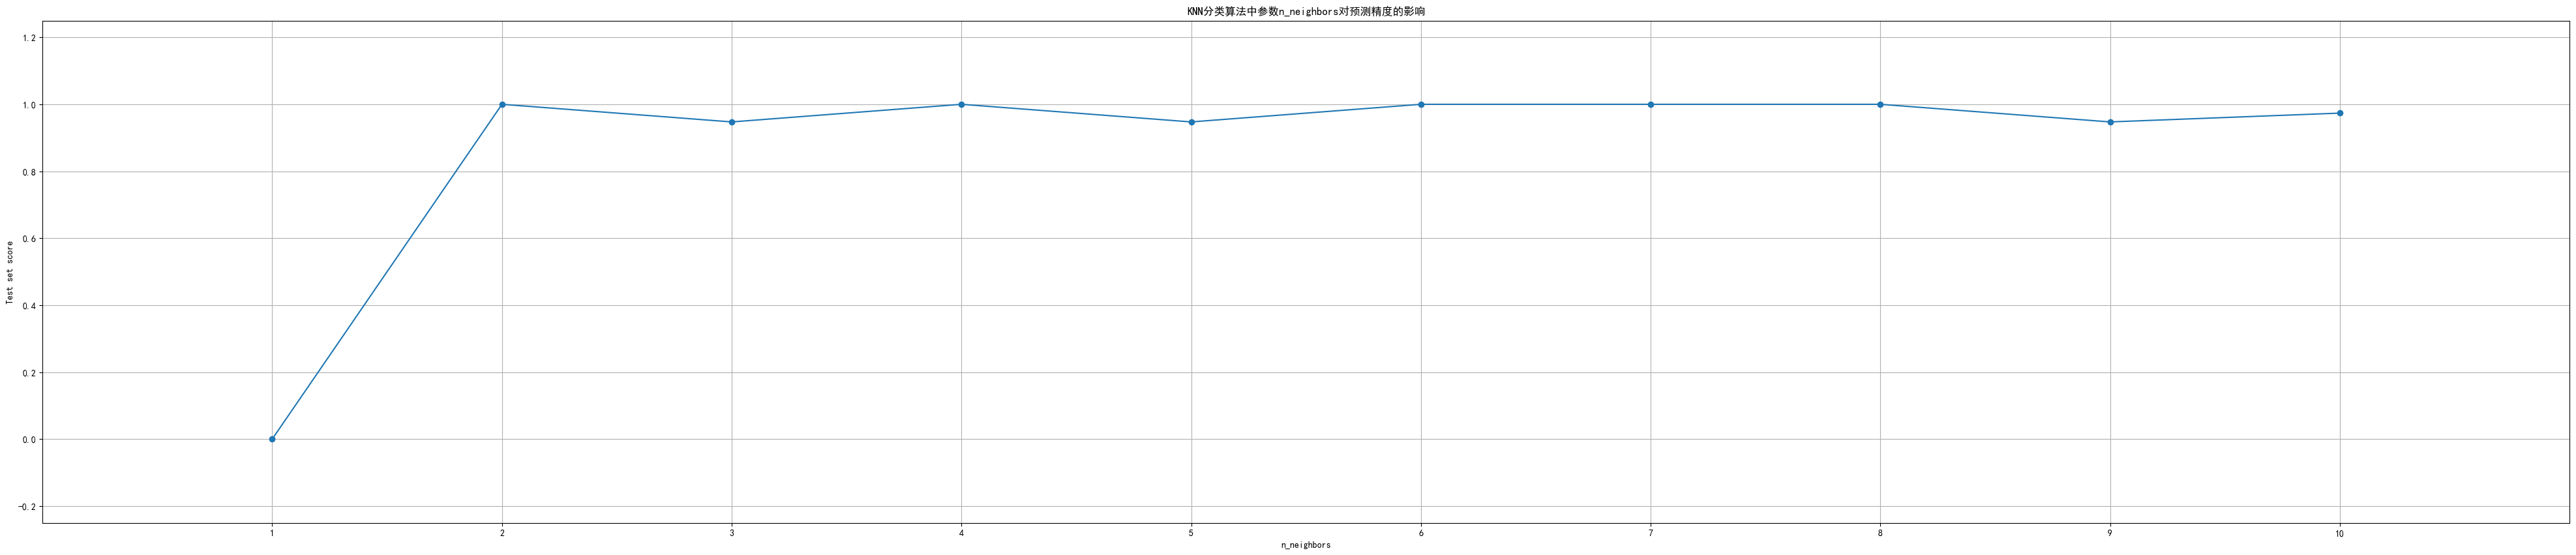

In [ ]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
def plot_line_chart(numbers):
    if not isinstance(numbers,list)or not numbers:
        print("请输入一个非空的数字列表。")
        return
    plt.figure(figsize=(50,10))# 设置图形大小
    plt.plot(numbers,marker='o') # 绘制折线，使用圆圈标记每个点
    ticks_labels =['1','2','3','4','5','6','7','8','9','10']
    plt.xticks(range(len(numbers)),ticks_labels)
    plt.ylim(min(numbers)-0.25, max(numbers)+0.25)
    plt.xlim(-1,len(numbers))
    plt.grid(True)
    plt.title('KNN分类算法中参数n_neighbors对预测精度的影响')
    plt.xlabel('n_neighbors') 
    plt.ylabel('Test set score') 
    plt.show() 


numbers_list =yx=y=a
plot_line_chart(numbers_list)